# 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

### Steps for the Process

1. **Data Cleaning**
2. **Exploratory Data Analysis (EDA)**
3. **Text Preprocessing**
4. **Model Building**
5. **Evaluation**
6. **Improvements**
7. **Website Conversion**
8. **Deployment on Render**

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2714,ham,I am thinking of going down to reg for pract l...,NaN,NaN,NaN
3030,ham,gonna let me know cos comes bak from holiday ...,NaN,NaN,NaN
5527,ham,"Total disappointment, when I texted you was th...",NaN,NaN,NaN
3885,ham,"Same, I'm at my great aunts anniversary party ...",NaN,NaN,NaN
3426,ham,Haha okay... Today weekend leh...,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)  #drop last 3 columns

In [7]:
df.sample(5)

,v1,v2
3665,ham,I'm turning off my phone. My moms telling ever...
2913,spam,Sorry! U can not unsubscribe yet. THE MOB offe...
2824,spam,Congratulations - Thanks to a good friend U ha...
1664,ham,ÌÏ v ma fan...
5441,ham,"By the way, make sure u get train to worc fore..."


In [8]:
#renaming the columns

df.rename(columns = {'v1':'Target','v2':'Text'}, inplace = True)

In [9]:
df.sample(5)

,Target,Text
4046,spam,"Thanks for your ringtone order, reference numb..."
2649,ham,You might want to pull out more just in case a...
2322,ham,Should I be stalking u?
271,ham,"Night has ended for another day, morning has c..."
1389,ham,"Haha... Where got so fast lose weight, thk muz..."


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
df['Target'] = encoder.fit_transform(df['Target'])

In [13]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
#check for duplicates
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

### EDA

In [19]:
df['Target'].value_counts(normalize=True)

Target
0    0.87367
1    0.12633
Name: proportion, dtype: float64

In [20]:
import matplotlib.pyplot as plt

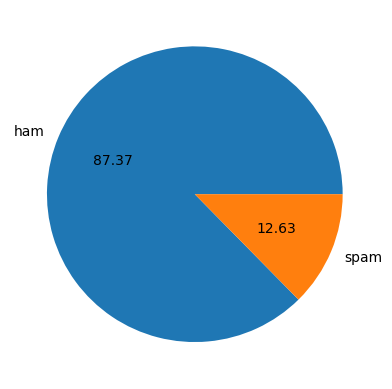

In [21]:
plt.pie(df['Target'].value_counts(normalize=True), labels = ['ham','spam'], autopct="%.2f")
plt.show()

In [22]:
#Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['Text'].apply(len) #len in terms of character used

In [26]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#number of words
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#Ham messages
df[df['Target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#Spam Messages
df[df['Target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

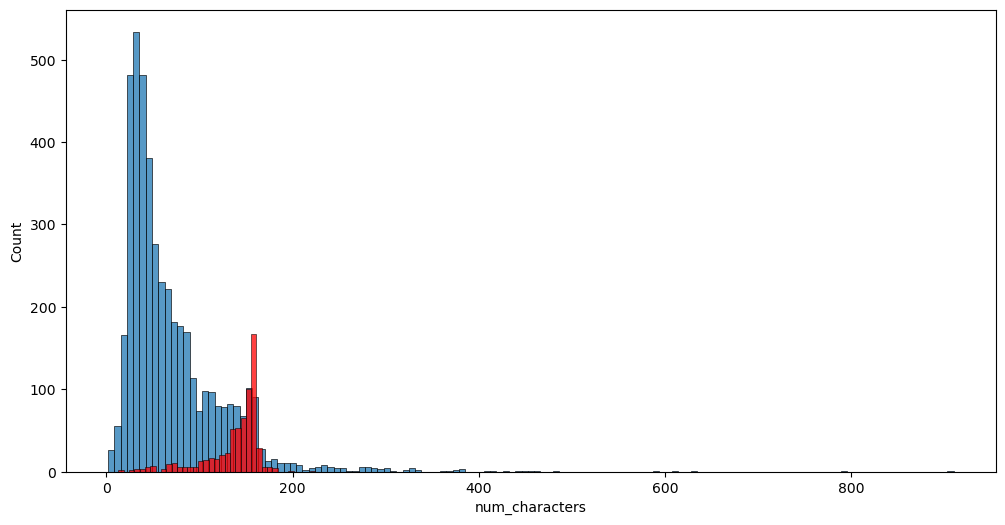

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] ==0]['num_characters'])
sns.histplot(df[df['Target'] ==1]['num_characters'], color = 'red')

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

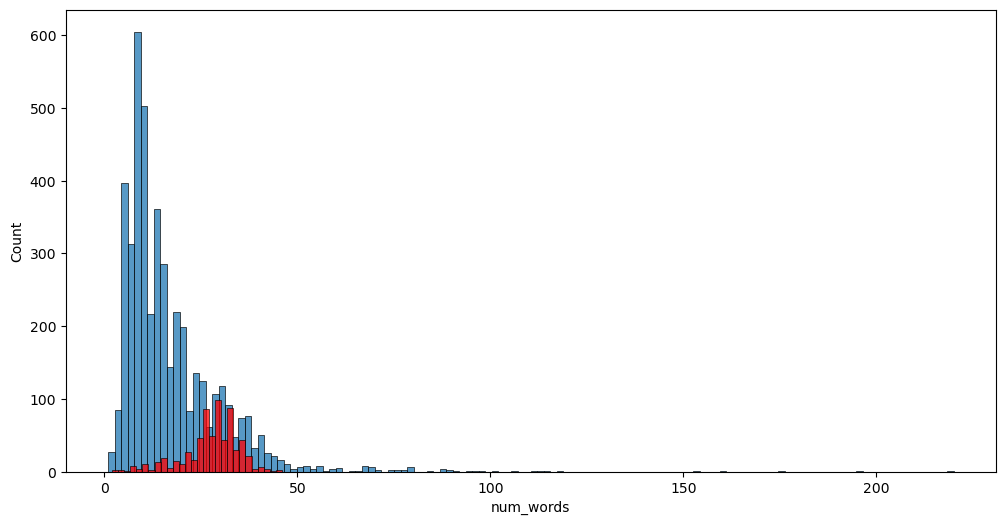

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] ==0]['num_words'])
sns.histplot(df[df['Target'] ==1]['num_words'], color = 'red')

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


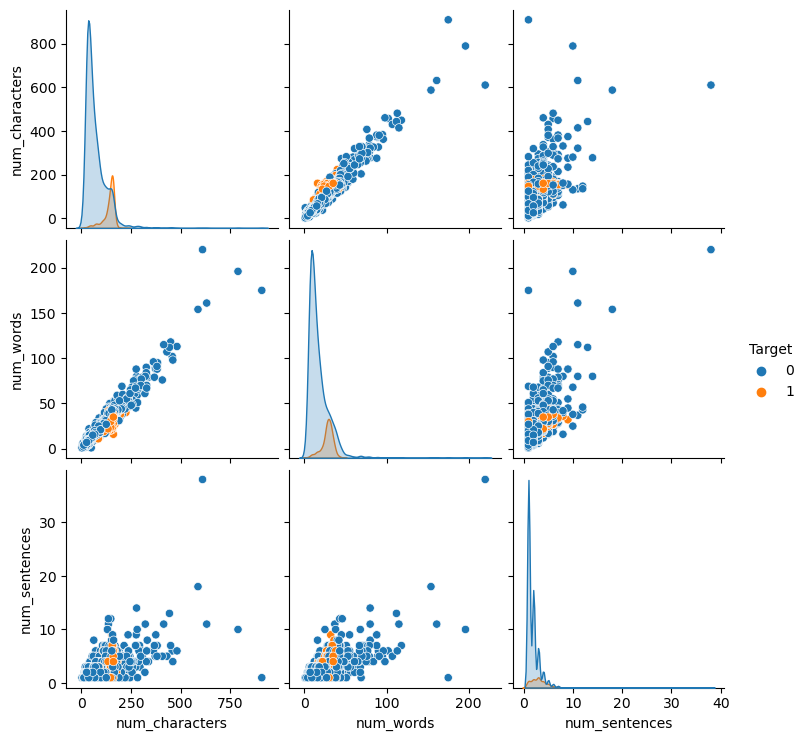

In [37]:
sns.pairplot(df,hue = 'Target')

<Axes: >

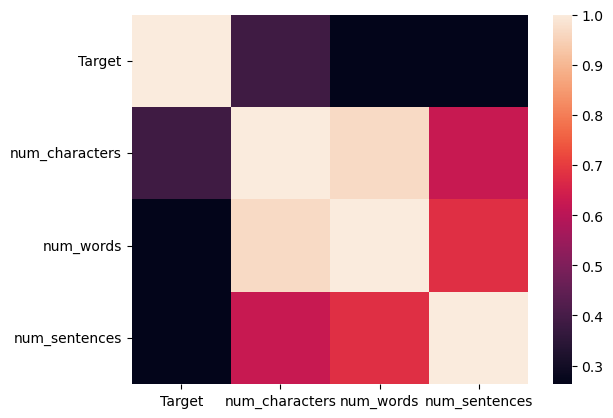

In [38]:
sns.heatmap(df.corr(numeric_only=True))

### Data Preprocessing

1. **Lower case**
2. **Tokenization**
3. **Removing special characters**
4. **Removinng Stop words and punctuation**
5. **Stemming**

In [39]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('arrived') #gives back root form of a word

'arriv'

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in  string.punctuation :
            y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [43]:
transform_text('Ashutosh is in Atlanta and want to learn machine learning')

'ashutosh atlanta want learn machin learn'

In [44]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
transform_text(df['Text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [47]:
df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [49]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep = " "))

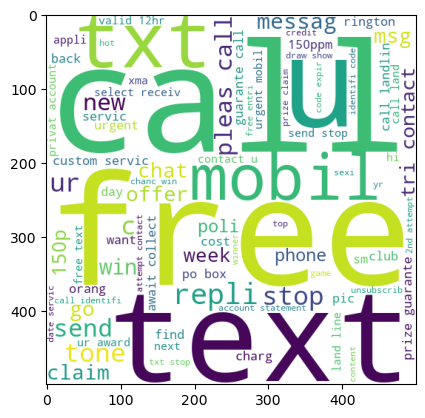

In [50]:
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep = " "))

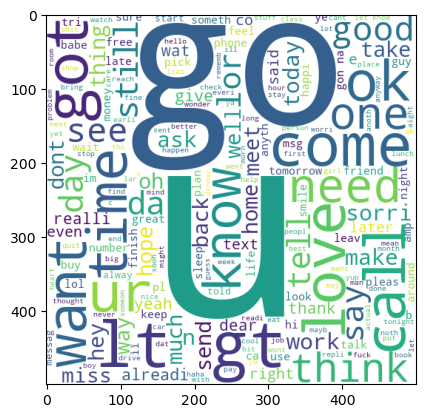

In [52]:
plt.imshow(ham_wc)

In [53]:
#Top 30 words

df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
df[df['Target'] ==1]['Transformed_text'].to_list()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [55]:
spam_corpus = []
for msg in df[df['Target'] ==1]['Transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)


In [56]:
len(spam_corpus)

9939

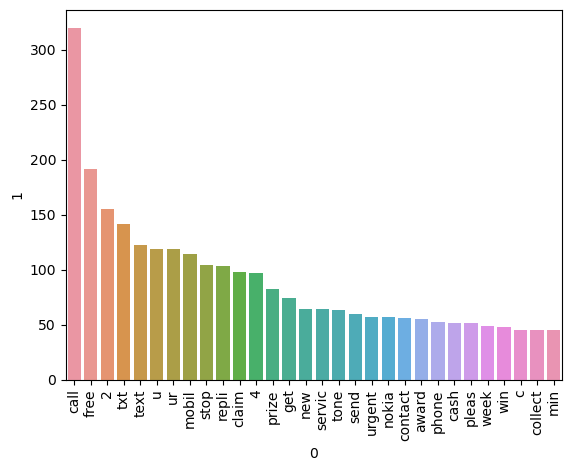

In [57]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =  pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [58]:
ham_corpus = []
for msg in df[df['Target'] ==0]['Transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

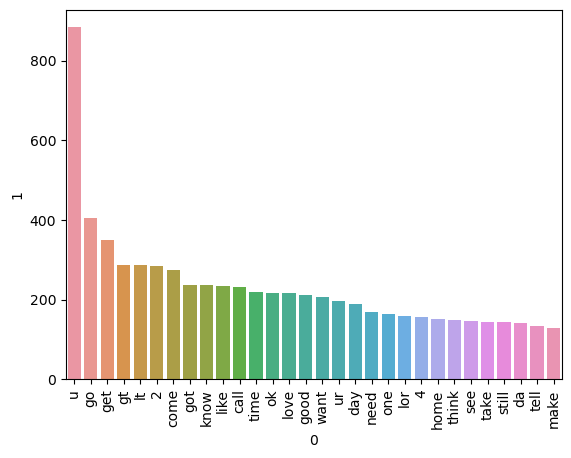

In [60]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y =  pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

### Model Building (Considering Naivee Bayes)

In [61]:
#Text vectorization
#Using Bag of words

df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [113]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features)

### Using Count vectorizer

In [63]:
X = cv.fit_transform(df['Transformed_text']).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
y  =df['Target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb =BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [72]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [73]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Using TfIdf

In [74]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [75]:
X.shape

(5169, 6708)

In [76]:
y  =df['Target'].values

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [80]:
##Best till now and precision score is what matters

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Tfidf mnb

In [82]:
#checking for multiple models

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [85]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state = 2)
xgb = XGBClassifier(n_estimators=50, random_state = 2)

In [92]:
clf1 = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'GBC' : gbc,
    'XGB' : xgb
}

In [87]:
def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clf1.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print('For ', name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision )
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  GBC
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  XGB
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [96]:
performance_df = pd.DataFrame({'Algorithm':clf1.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [104]:
performance_df.sort_values(by ='Precision', ascending=  False, inplace=True)

### model improvement
#1. change the max_features parameter in Tfidf

In [116]:
tfidf = TfidfVectorizer(max_features = 3000)
X = tfidf.fit_transform(df['Transformed_text']).toarray()
y  =df['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [118]:
accuracy_scores = []
precision_scores = []

for name,clf in clf1.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print('For ', name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision )
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  GBC
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  XGB
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [121]:
performance_df1 = pd.DataFrame({'Algorithm':clf1.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [122]:
performance_df.merge(performance_df1,on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,SVC,0.972921,0.974138,0.975822,0.974790
4,AdaBoost,0.961315,0.945455,0.960348,0.929204
5,XGB,0.972921,0.943548,0.967118,0.926230
6,LR,0.951644,0.940000,0.958414,0.970297
7,GBC,0.952611,0.923810,0.946809,0.919192
8,DT,0.936170,0.846154,0.927466,0.811881


In [123]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))